In [3]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import pydot
import warnings 
warnings.filterwarnings('ignore') 
  
from tensorflow import keras 
from keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory 
  
import os 
import matplotlib.image as mpimg

In [4]:
path = 'Cats and Dogs image classification'
classes = os.listdir(path) 
classes 

['test', 'train']

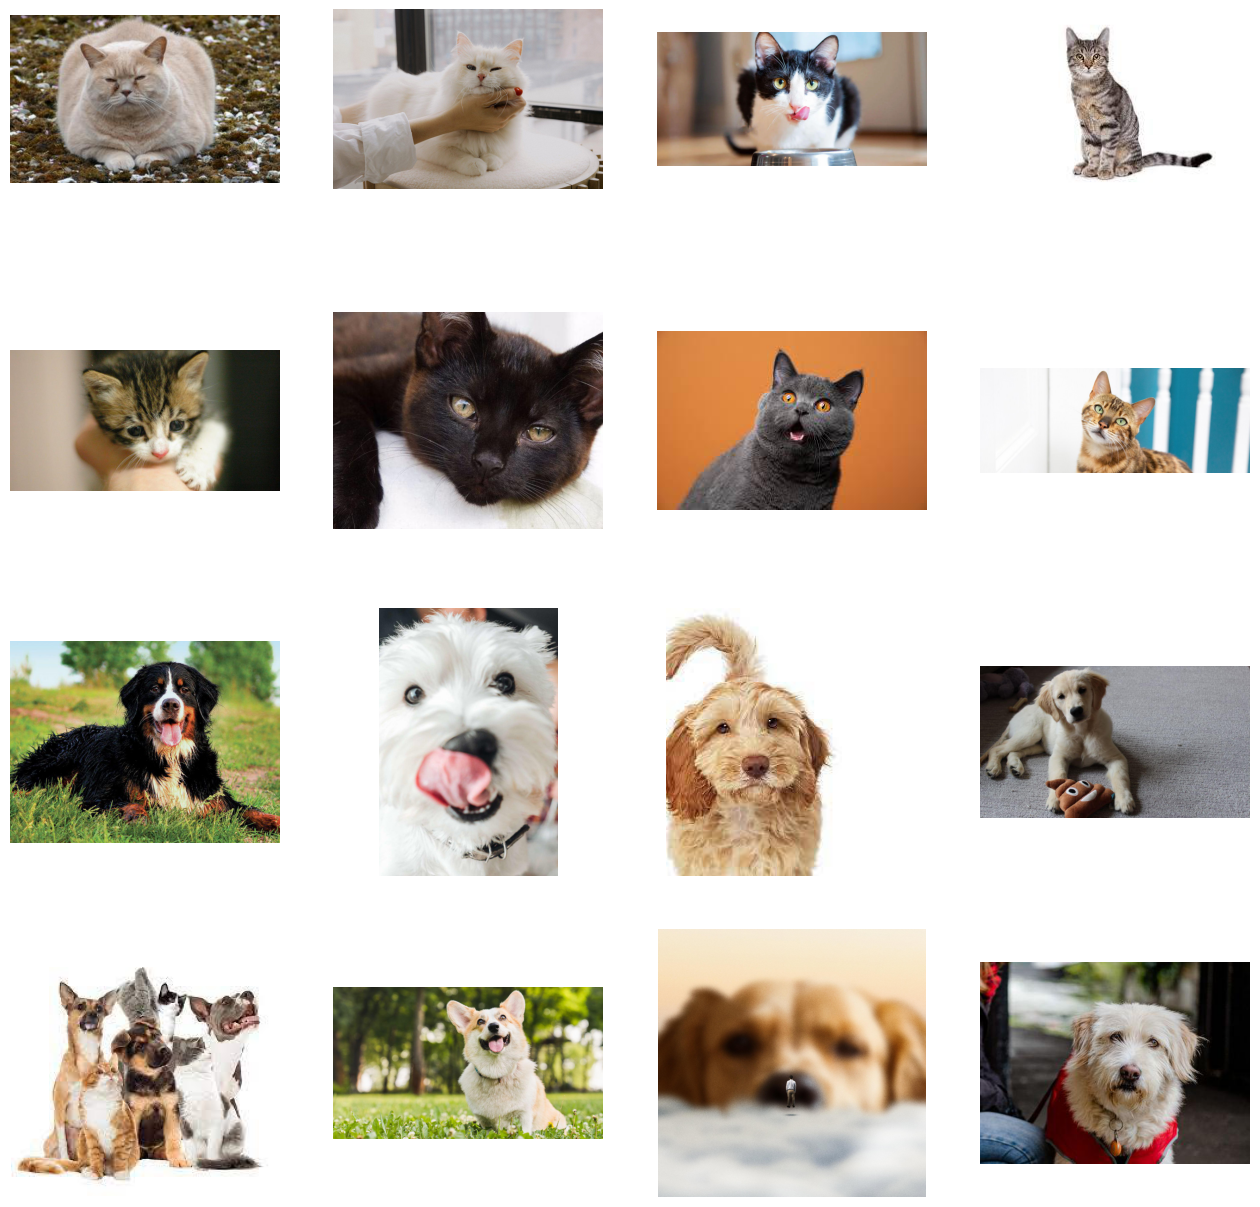

In [7]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

train_dir = 'Cats and Dogs image classification/train'
test_dir = 'Cats and Dogs image classification/test'

cat_train_dir = os.path.join(train_dir, 'cats')
cat_test_dir = os.path.join(test_dir, 'cats')
dog_train_dir = os.path.join(train_dir, 'dogs')
dog_test_dir = os.path.join(test_dir, 'dogs')

cat_train_names = os.listdir(cat_train_dir)
cat_test_names = os.listdir(cat_test_dir)
dog_train_names = os.listdir(dog_train_dir)
dog_test_names = os.listdir(dog_test_dir)

pic_index = 210

cat_train_images = [os.path.join(cat_train_dir, fname) 
                    for fname in cat_train_names[pic_index-8:pic_index]]
cat_test_images = [os.path.join(cat_test_dir, fname) 
                   for fname in cat_test_names[pic_index-8:pic_index]]
dog_train_images = [os.path.join(dog_train_dir, fname) 
                    for fname in dog_train_names[pic_index-8:pic_index]]
dog_test_images = [os.path.join(dog_test_dir, fname) 
                   for fname in dog_test_names[pic_index-8:pic_index]]

images = cat_train_images + cat_test_images + dog_train_images + dog_test_images

for i, img_path in enumerate(images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [9]:
# Pada proses ini, terlihat hasil gambar training dan test data dari gambar anjing dan kucing yang dimana setiap folder berisi 12500 gambar 
#hewan masing-masing.


In [11]:
base_dir = 'Cats and Dogs image classification'
  
train_datagen = image_dataset_from_directory(base_dir, 
                                                  image_size=(200,200), 
                                                  subset='training', 
                                                  seed = 1, 
                                                 validation_split=0.1, 
                                                  batch_size= 32) 
test_datagen = image_dataset_from_directory(base_dir, 
                                                  image_size=(200,200), 
                                                  subset='validation', 
                                                  seed = 1, 
                                                 validation_split=0.1, 
                                                  batch_size= 32)

Found 697 files belonging to 2 classes.
Using 628 files for training.
Found 697 files belonging to 2 classes.
Using 69 files for validation.


In [13]:
model = tf.keras.models.Sequential([ 
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 

	layers.Flatten(), 
	layers.Dense(512, activation='relu'), 
	layers.BatchNormalization(), 
	layers.Dense(512, activation='relu'), 
	layers.Dropout(0.1), 
	layers.BatchNormalization(), 
	layers.Dense(512, activation='relu'), 
	layers.Dropout(0.2), 
	layers.BatchNormalization(), 
	layers.Dense(1, activation='sigmoid') 
]) 


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [17]:
# Membuat model arsitektur dari keras untuk pemrosesan gambar. Pada summary model arsitektur tersebut, terdapat model yang berisi lapisan sebagai berikut
# 1. Empat convolutional layer diikuti oleh lapisan maxpooling
# 2. Layer flatten untuk meratakan output convolutional layer
# 3. Kemudian dimiliki 3 lapisan yang terhubung  sepenuhnya diikuti dengan output lapisan flatten
# 4. Disertakan beberapa layer BatchNormalization untuk memungkinkan training yang stabil dan cepat serta layer dropout sebelum layer terakhir 
#untuk menghindari kemungkinan overfitting. 
# 5. Layer terakhir adalah layer output yang mempunyai fungsi aactivation sigmoid untuk mengklasifikasikan hasil menjadi dua kelas.


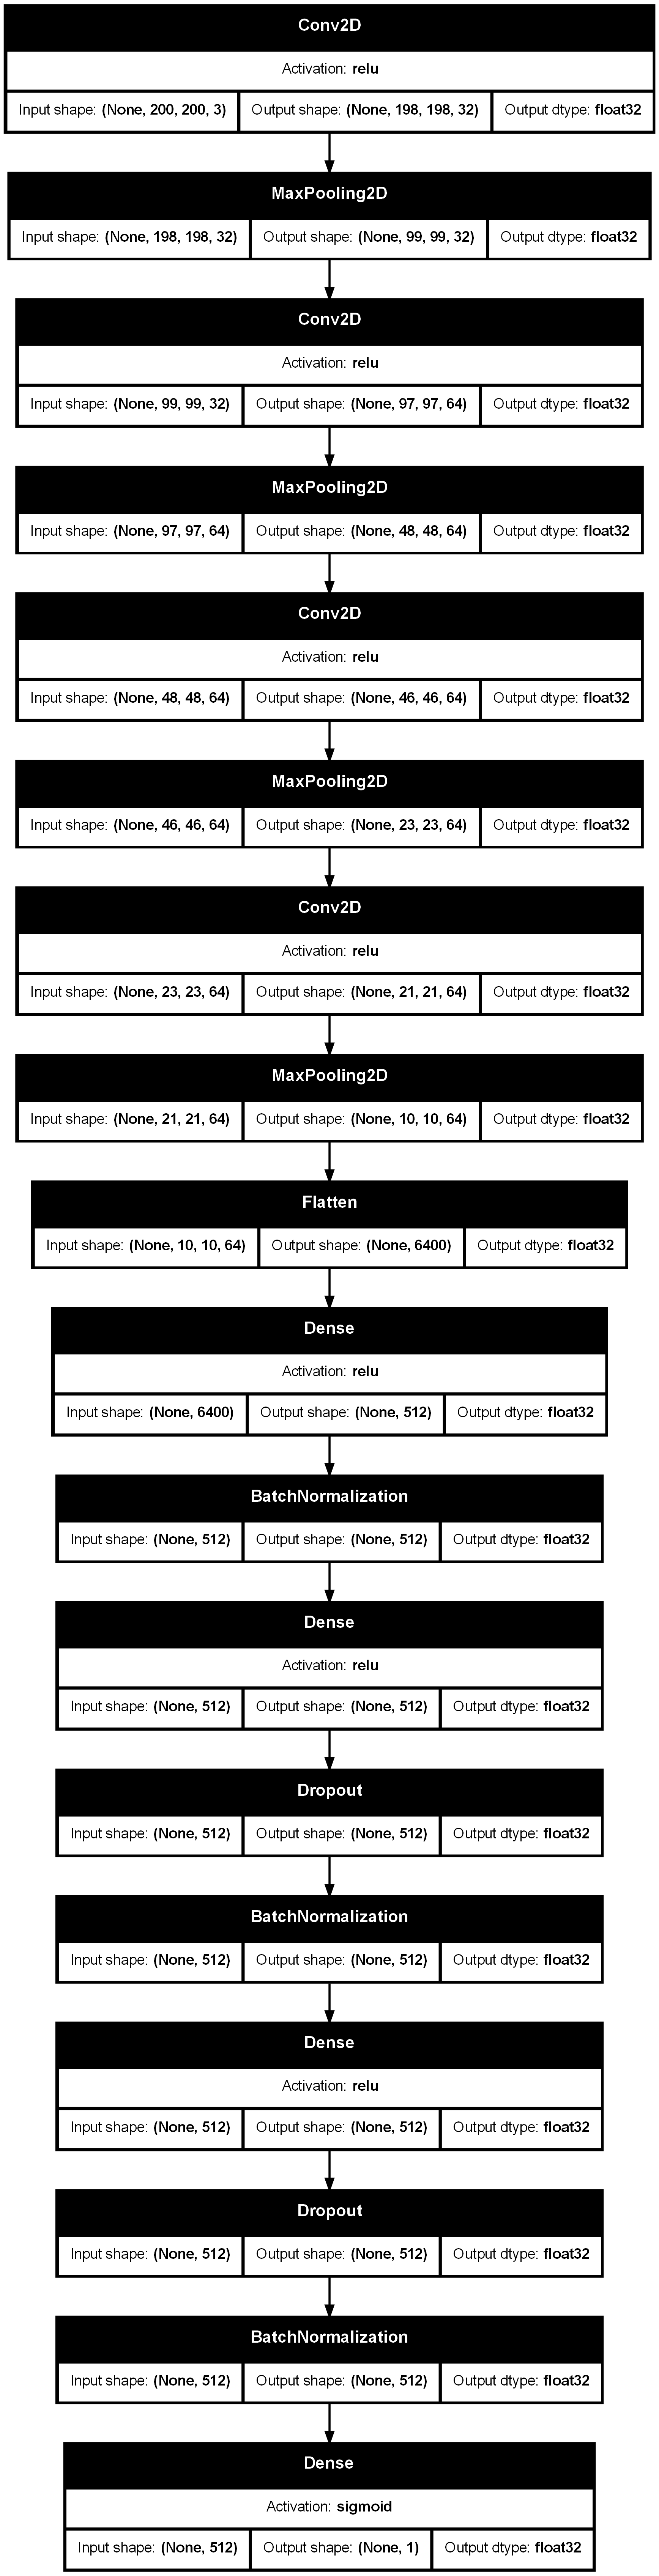

In [19]:
keras.utils.plot_model( 
	model, 
	show_shapes=True, 
	show_dtype=True, 
	show_layer_activations=True
) 

In [21]:
# Terdapat banyaknya parameter dan kompleksitas model yang membantu untuk mencapai model berkinerja tinggi 

In [23]:
model.compile( 
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'] 
) 

In [25]:
history = model.fit(train_datagen, 
          epochs=10, 
          validation_data=test_datagen) 

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 222ms/step - accuracy: 0.5287 - loss: 0.9438 - val_accuracy: 0.8116 - val_loss: 8.3152
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - accuracy: 0.6755 - loss: 0.6740 - val_accuracy: 0.8116 - val_loss: 1.2264
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.7196 - loss: 0.5825 - val_accuracy: 0.8116 - val_loss: 1.4185
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.7584 - loss: 0.5730 - val_accuracy: 0.2174 - val_loss: 1.5693
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.7852 - loss: 0.5020 - val_accuracy: 0.3043 - val_loss: 1.1668
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - accuracy: 0.7918 - loss: 0.4526 - val_accuracy: 0.6522 - val_loss: 0.6776
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.8158 - loss: 0.4182 - val_accuracy: 0.2319 - val_loss: 1.3135
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.7995 - loss: 0.4580 - val_accuracy: 0.

In [27]:
#Dilakukannya training model. Model akan berfungsi dengan baik pada epoch = 10. pada gambar tersebut training model berfungsi dengan baik

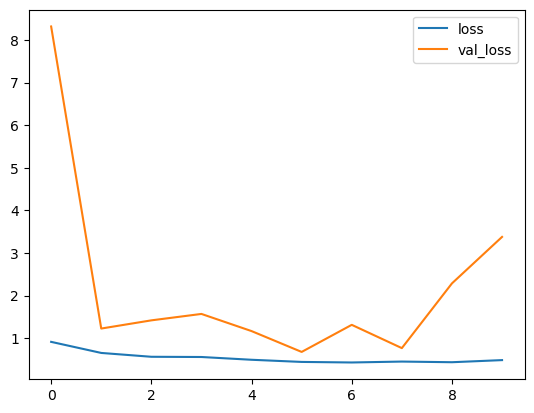

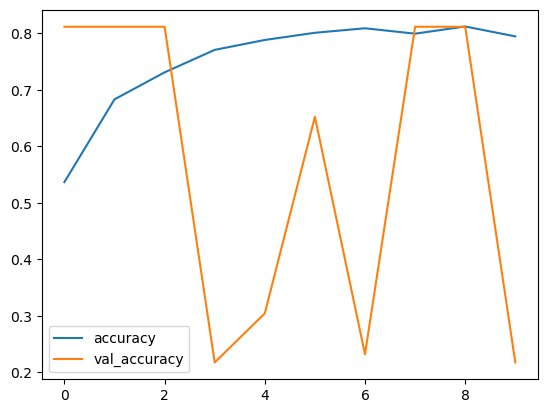

In [127]:
history_df = pd.DataFrame(history.history) 
history_df.loc[:, ['loss', 'val_loss']].plot() 
history_df.loc[:, ['accuracy', 'val_accuracy']].plot() 
plt.show() 

In [31]:
# Dilakukannya visualisasi data dari keakuratan training dan validasi di setiap epoch. Pada plot pertama, pada bagian val_loss terjadi ketidakstabilan 
#dan cenderung merendah dan kemudian naik perlahan. Dan untuk loss, terjadi penurunan secara signifikan Pada plot kedua, 
#bagian val_accuracy tidak stabil, kemudian menurun drastis. Untuk yang accuracy, terjadi kenaikan yang sangat cepat.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image 1: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Image 2: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image 3: Dog


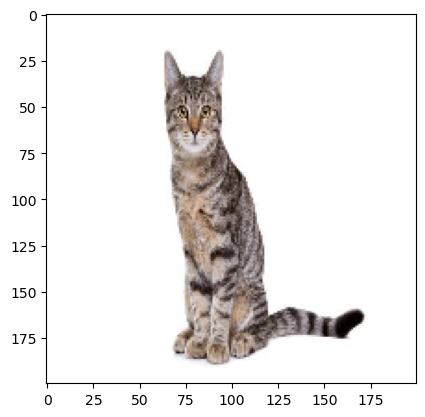

In [153]:
from keras.preprocessing import image 
  
test_image1 = image.load_img(r'C:\Users\ramad\Downloads\Cats and Dogs image classification\test\cats\cat_88.jpg',target_size=(200,200))
plt.imshow(test_image1) 
test_image1 = image.img_to_array(test_image1) 
test_image1 = np.expand_dims(test_image1,axis=0)

test_image2 = image.load_img(r'C:\Users\ramad\Downloads\Cats and Dogs image classification\test\cats\cat_422.jpg',target_size=(200,200))
plt.imshow(test_image2) 
test_image2 = image.img_to_array(test_image2) 
test_image2 = np.expand_dims(test_image2,axis=0)

test_image3 = image.load_img(r'C:\Users\ramad\Downloads\Cats and Dogs image classification\test\cats\cat_417.jpg',target_size=(200,200))
plt.imshow(test_image3) 
test_image3 = image.img_to_array(test_image3) 
test_image3 = np.expand_dims(test_image3,axis=0)

test_images = [test_image1, test_image2, test_image3]

for i, test_image in enumerate(test_images):
    result = model.predict(test_image)
    if (np.argmax(result) == 0):
        print(f"Image {i+1}: Dog")
    else:
        print(f"Image {i+1}: Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image 1: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Image 2: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image 3: Dog


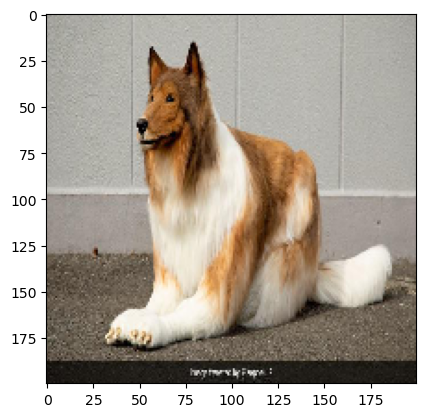

In [159]:
test_image1 = image.load_img(r'C:\Users\ramad\Downloads\Cats and Dogs image classification\test\dogs\dog_75.jpg', target_size=(200, 200))
plt.imshow(test_image1) 
test_image1 = image.img_to_array(test_image1) 
test_image1 = np.expand_dims(test_image1,axis=0)

test_image2 = image.load_img(r'C:\Users\ramad\Downloads\Cats and Dogs image classification\test\dogs\dog_415.jpg', target_size=(200, 200))
plt.imshow(test_image2) 
test_image2 = image.img_to_array(test_image2) 
test_image2 = np.expand_dims(test_image2,axis=0)

test_image3 = image.load_img(r'C:\Users\ramad\Downloads\Cats and Dogs image classification\test\dogs\dog_196.jpg', target_size=(200, 200))
plt.imshow(test_image3) 
test_image3 = image.img_to_array(test_image3) 
test_image3 = np.expand_dims(test_image3,axis=0)

test_images = [test_image1, test_image2, test_image3]

for i, test_image in enumerate(test_images):
    result = model.predict(test_image)
    if (np.argmax(result) == 0):
        print(f"Image {i+1}: Dog")
    else:
        print(f"Image {i+1}: Cat")